Import packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

Create a binary toy dataset

In [ ]:
# Generate toy binary classification problem with more noise
np.random.seed(42)
X, y = make_classification(
    n_features=2,                # Two-dimensional data
    n_redundant=0,               # No redundant features
    n_informative=2,             # Two informative features
    n_clusters_per_class=1,      # One cluster per class
    n_samples=200,               # More samples for better visualization
    class_sep=1,               # Lower class separation to increase overlap                
    random_state=42
)

# Define plot limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Linear Boundries
We begin by exploring models that assume the data can be separated by a straight line (or a hyperplane in higher dimensions), resulting in a linear decision boundary. These models are particularly effective when the relationship between the input features and class labels is inherently linear. The models we focus on are:
- Logistic Regression
- Linear SVM
- LDA

### Logistic Regresion
This statistical model predicts the probability of a binary outcome based on a linear combination of input features, identifying a linear boundary by maximizing classification likelihood. Class output is determined by the probability threshold, which defaults to 0.5. Increasing the threshold shifts the boundary toward the positive class, shrinking its region, while decreasing it expands the positive class region

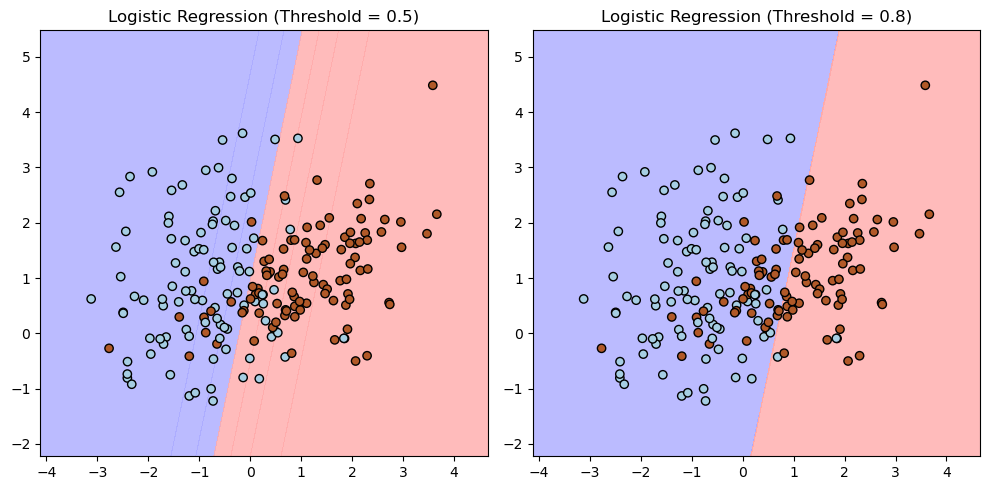

In [58]:
model = LogisticRegression()
model.fit(X, y)
# Predict probabilities for the meshgrid
probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Standard threshold (0.5)
Z_default = probs.reshape(xx.shape)
# Custom threshold (0.8)
Z_custom = (probs >= 0.8).astype(int)
Z_custom = Z_custom.reshape(xx.shape)
# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
titles = ["Logistic Regression (Threshold = 0.5)", "Logistic Regression (Threshold = 0.8)"]
boundaries = [Z_default, Z_custom]

for i, (ax, Z) in enumerate(zip(axes, boundaries)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF","#FFAAAA" ]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### Linear SVM
This model identifies a linear boundary that maximizes the margin between classes, focusing on support vectors. The decision boundary is influenced by the $C$parameter, which balances margin width and classification errors. A high $C$ creates a boundary tightly fitted to the data, potentially overfitting, while a low $C$ widens the margin, allowing more misclassifications and improving generalization.

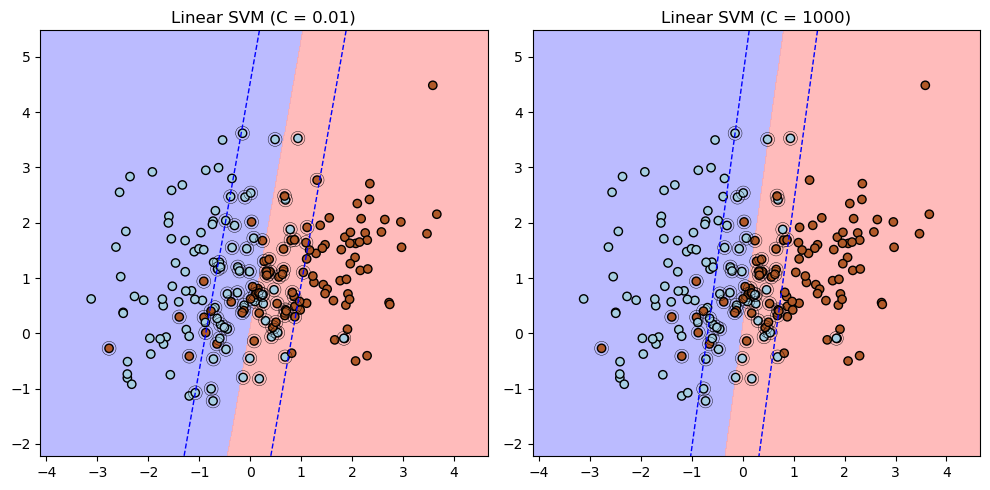

In [53]:
# Train Linear SVM models with different C values
svm_C1 = SVC(kernel="linear", C=0.1)
svm_C100 = SVC(kernel="linear", C=1000)
svm_C1.fit(X, y)
svm_C100.fit(X, y)

# Predict decision boundaries and margins
Z_C1 = svm_C1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_C100 = svm_C100.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries with margins
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
titles = ["Linear SVM (C = 0.01)", "Linear SVM (C = 1000)"]
boundaries = [Z_C1, Z_C100]

for i, (ax, Z, model) in enumerate(zip(axes, boundaries, [svm_C1, svm_C100])):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap([ "#AAAAFF","#FFAAAA"]))
    # Add margin lines
    ax.contour(xx, yy, Z, levels=[-1, 1], colors="blue", linewidths=1, linestyles="dashed")
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=.3)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### LDA
This model identifies a linear boundary by modeling class distributions and assuming shared covariance. The decision boundary is influenced by class priors, which weight the importance of each class. Higher priors for one class shift the boundary toward the less probable class, expanding the dominant class region, while equal priors create a balanced separation.

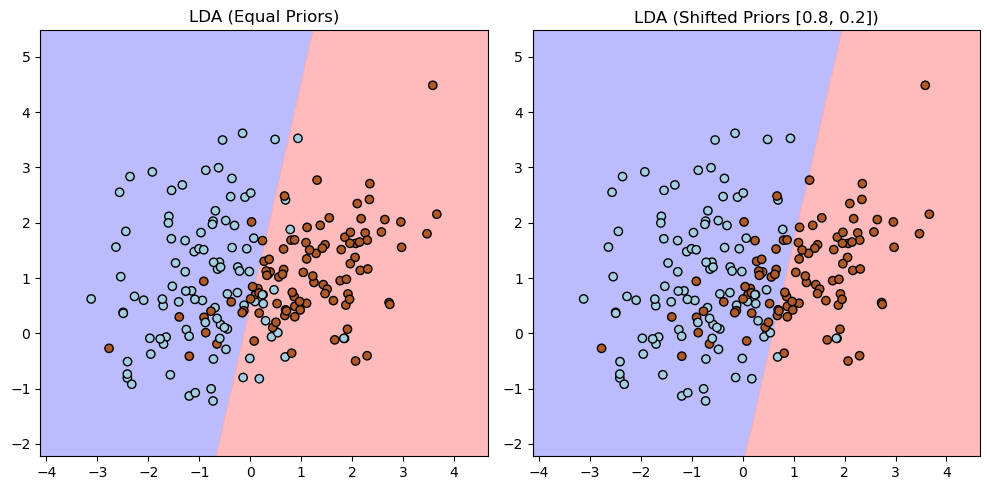

In [61]:
# Train LDA models with different priors
lda_prior_equal = LinearDiscriminantAnalysis()  # Equal priors since default is based on class frequencies and we have half data in each
lda_prior_shifted = LinearDiscriminantAnalysis(priors=[0.8, 0.2])  # Shifted priors
lda_prior_equal.fit(X, y)
lda_prior_shifted.fit(X, y)

# Predict decision boundaries
Z_equal = lda_prior_equal.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_shifted = lda_prior_shifted.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries with margins
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
titles = ["LDA (Equal Priors)", "LDA (Shifted Priors [0.8, 0.2])"]
boundaries = [Z_equal, Z_shifted]

for i, (ax, Z, model) in enumerate(zip(axes, boundaries, [lda_prior_equal, lda_prior_shifted])):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap(["#AAAAFF","#FFAAAA" ]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()